In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#import sklearn as skl
from sklearn.neighbors import kneighbors_graph

Tutorial notebook for the creation of a kNN graph from feature vectors and its analysis: community detection and PageRank. Demonstation using networkx. 

# Data
Create a matrix of random points in $\mathbb{R}^N$.

In [2]:
nb_samples = 30
nb_features = 500
X = np.random.normal(size=(nb_samples,nb_features))

# Graph
We create a kNN graph from the vectors. We use scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html 

In [3]:
# create the adjacency matrix of the nearest neighbor graph
nb_neighbors = 4
A = kneighbors_graph(X, nb_neighbors, mode='distance', metric='l1')

The entries in the adjacency matrix are the distances. We want to convert them to weights: small distance have large weights.
The adjacency matrix is a sparse matrix. We want to keep the zeros (no connection) unchanged and turn the distance into weights. We want to use the following formula for weights $w_{ij}$ on the non-zero entries only:
$$ w_{ij} = \exp\left(-\frac{a_{ij}^2}{\alpha^2}\right), \qquad \forall a_{ij}>0,
$$
with $\alpha$ the mean value of the distances between connected nodes.

In [4]:
# computing the mean value of the non-zero entries of A
mean_A = A.sum()/A.getnnz()
print(f'Mean value of non zero entries: {mean_A}')

Mean value of non zero entries: 545.0160335084626


In [5]:
# Turn the non-zero distance into weights
_ = np.exp( -A.data**2/np.mean(A.data)**2, out=A.data )

In [6]:
#A.toarray()

In [7]:
# Create the Networkx directed graph from the adjacency matrix
G = nx.DiGraph(A)

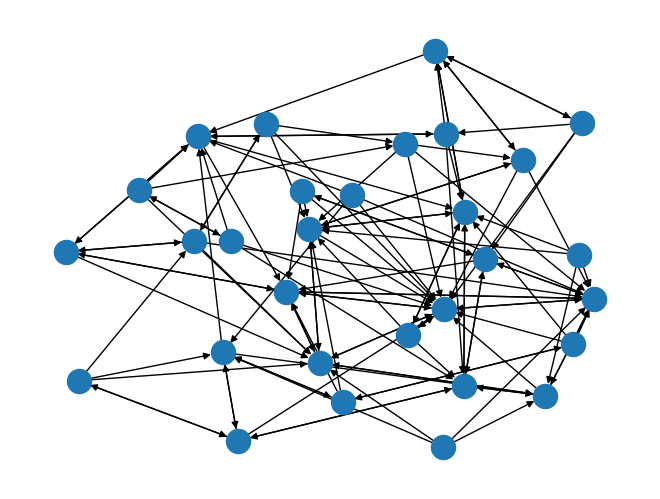

In [8]:
nx.draw(G)
plt.show()

## Finding communities

Documentation https://networkx.org/documentation/stable/reference/algorithms/community.html

In [9]:
c = nx.community.girvan_newman(G)
top_level_communities = next(c)
print(top_level_communities)

({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29}, {8, 27, 22})


In [10]:
# We need a dictionary for the communities to assign more easily to the nodes
def community_dict(community_list):
    c_dic = {}
    for num, community in enumerate(community_list):
        for node in community:
            c_dic[node]=num
    return c_dic

In [11]:
cGN = community_dict(top_level_communities)
nx.set_node_attributes(G, cGN, name='cGN') # record the community on each node as an attribute

In [12]:
# Display the node attributes
G.nodes[0]

{'cGN': 0}

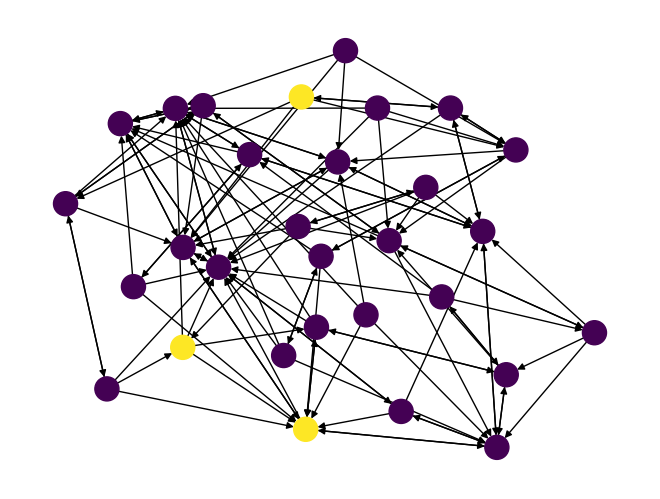

In [13]:
nx.draw(G, node_color=list(cGN.values()))
plt.show()

In [14]:
partition = nx.community.louvain_communities(G)
print(f'Number of communities: {len(partition)}')
cLouvain = community_dict(partition)
nx.set_node_attributes(G, cLouvain, name='cLouvain')

Number of communities: 9


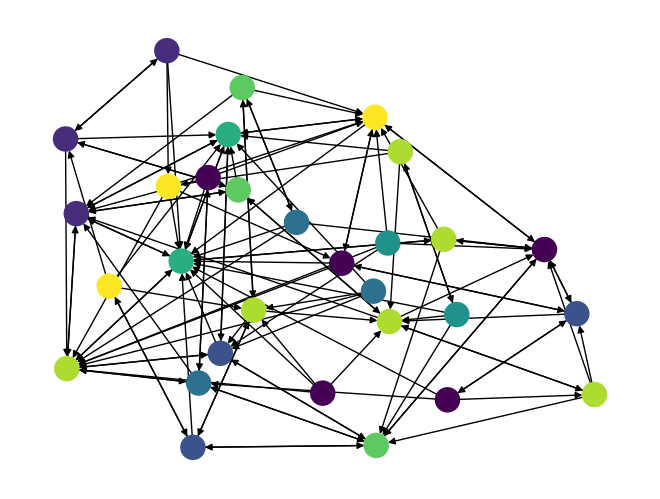

In [15]:
nx.draw(G, node_color=list(cLouvain.values()))
plt.show()

## Pagerank

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#pagerank


In [16]:
pgrank = nx.pagerank(G)

In [17]:
nx.set_node_attributes(G, pgrank, name='Pagerank')

In [18]:
nx.get_node_attributes(G, name='Pagerank')

{0: 0.010770396343321498,
 1: 0.013541605113154786,
 2: 0.02590325396998675,
 3: 0.005000000000000001,
 4: 0.05710520976820718,
 5: 0.09727027494873873,
 6: 0.00839374793553361,
 7: 0.01606888307942555,
 8: 0.022221459971895,
 9: 0.02772916626131882,
 10: 0.061478886519189715,
 11: 0.005000000000000001,
 12: 0.04031384498535741,
 13: 0.007109903201472971,
 14: 0.005000000000000001,
 15: 0.0063339339428064734,
 16: 0.12360780040907263,
 17: 0.09255849204773292,
 18: 0.009881757819888266,
 19: 0.05672896800467715,
 20: 0.03427755017898158,
 21: 0.028148348266418623,
 22: 0.0160265638867831,
 23: 0.013277987941627028,
 24: 0.0435799154958596,
 25: 0.087885433606009,
 26: 0.006368096289321447,
 27: 0.009734244607147852,
 28: 0.008094802721605166,
 29: 0.060589472684467294}

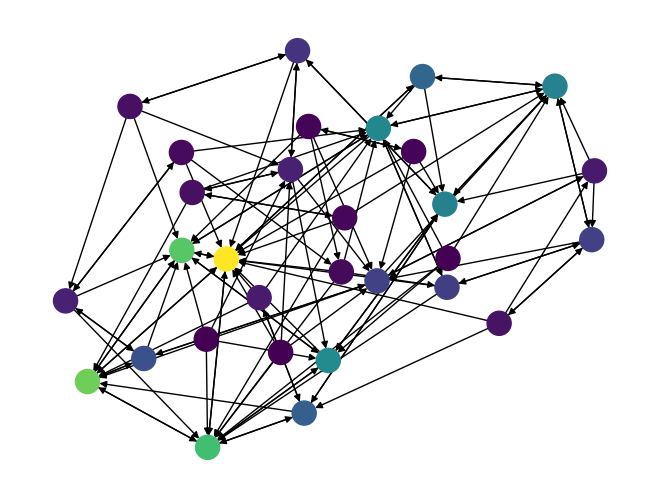

In [19]:
nx.draw(G, node_color=list(pgrank.values()))
plt.show()

## Save the graph in a file

Can be read with Gephi

In [20]:
nx.write_graphml(G,'graph.graphml')